In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## [A] Train Data

In [2]:
train_data = pd.read_csv('train_loan.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Handling Missing Values

In [6]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train_data['Loan_ID'].nunique()

614

In [8]:
missing_val = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
miss_cat_feat = ['Gender', 'Married', 'Dependents', 'Self_Employed']

#### Fixing NA in Categorical Colums

In [9]:
train_data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace = True)

In [11]:
train_data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [12]:
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace = True)

In [13]:
train_data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [14]:
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace = True)

In [15]:
train_data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [16]:
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace = True)

#### Fixing Missing Values in Numeric Columns

In [17]:
miss_num_feat = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

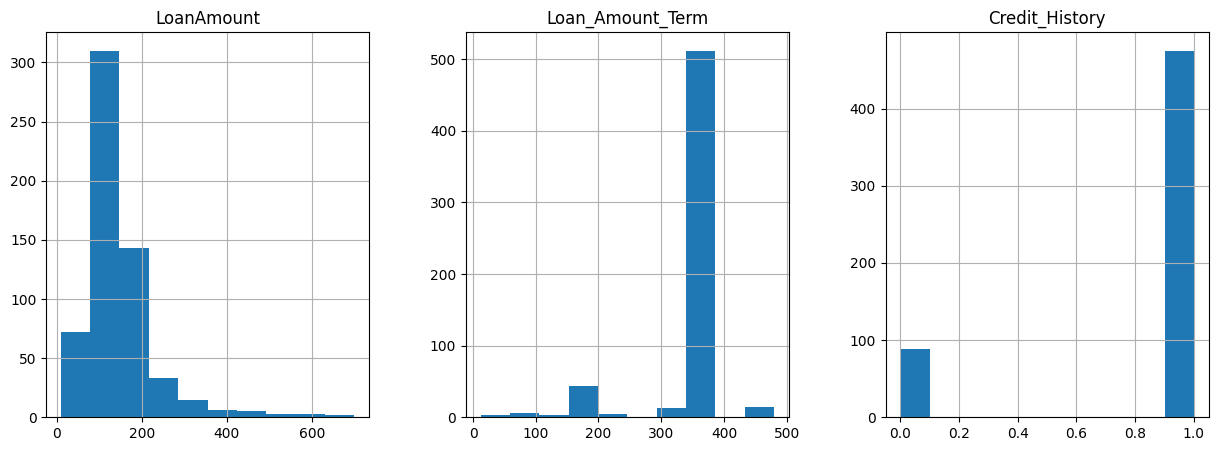

In [18]:
fig, axis = plt.subplots(1,3, figsize =(15,5))
train_data.hist(ax = axis, column=miss_num_feat)
plt.show();

Since LoanAmount is right skewed, Filling NA with median value

In [19]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [20]:
train_data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [21]:
train_data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

Since Loan_Amount_Term and Credit_History have distinct set of values, filling NA with mode of the respective feature 

In [22]:
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [23]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [24]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Handling Outliers

In [25]:
out_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

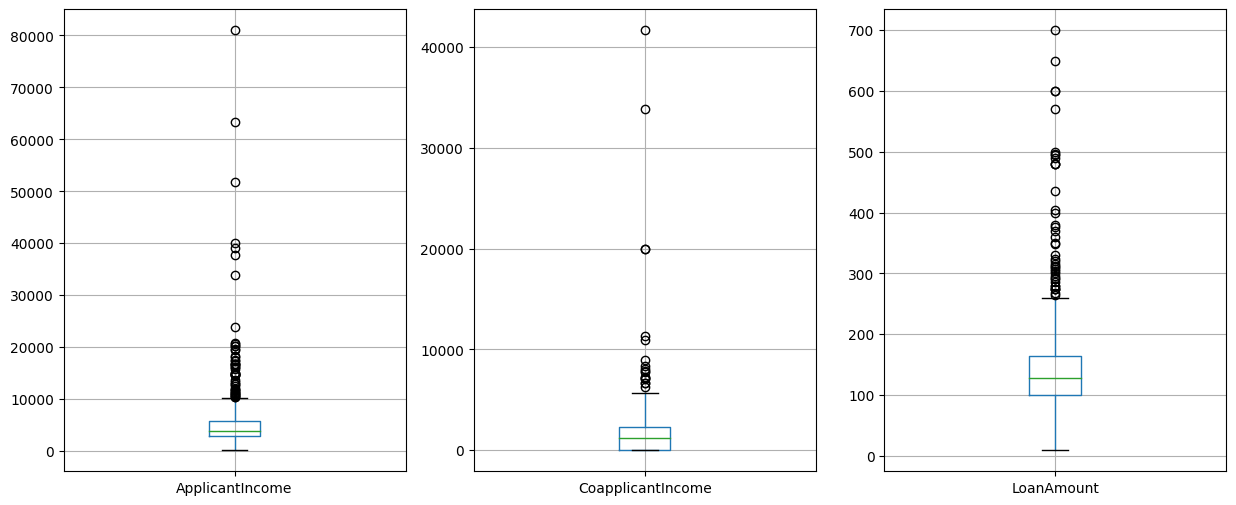

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
 

train_data.boxplot(out_cols[0], ax=ax[0])
train_data.boxplot(out_cols[1], ax=ax[1])
train_data.boxplot(out_cols[2], ax=ax[2])

 
plt.subplots_adjust(wspace=0.2) 

 
plt.show()

#### Fixing Outliers by Capping and Flooring Method

In [27]:
def cap_floor(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [28]:
#Applicant Income

q1 = train_data['ApplicantIncome'].quantile(0.25)
q3 = train_data['ApplicantIncome'].quantile(0.75)
print('Q1 and Q3 for Applicant Income: ', q1, q3)
iqr = q3-q1
print('IQR : ', iqr)
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print("Upper Limit and Lower Limit: ", upper_limit, lower_limit)

train_data['ApplicantIncome'] = train_data['ApplicantIncome'].apply(cap_floor)

Q1 and Q3 for Applicant Income:  2877.5 5795.0
IQR :  2917.5
Upper Limit and Lower Limit:  10171.25 -1498.75


In [29]:
#CoApplicant Income

q1 = train_data['CoapplicantIncome'].quantile(0.25)
q3 = train_data['CoapplicantIncome'].quantile(0.75)
print('Q1 and Q3 for CoApplicant Income: ', q1, q3)
iqr = q3-q1
print('IQR : ', iqr)
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print("Upper Limit and Lower Limit: ", upper_limit, lower_limit)

train_data['CoapplicantIncome'] = train_data['CoapplicantIncome'].apply(cap_floor)

Q1 and Q3 for CoApplicant Income:  0.0 2297.25
IQR :  2297.25
Upper Limit and Lower Limit:  5743.125 -3445.875


In [30]:
#Loan Amount

q1 = train_data['LoanAmount'].quantile(0.25)
q3 = train_data['LoanAmount'].quantile(0.75)
print('Q1 and Q3 for LoanAmount: ' , q1, q3)
iqr = q3-q1
print('IQR : ', iqr)
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print("Upper Limit and Lower Limit: ", upper_limit, lower_limit)

train_data['LoanAmount'] = train_data['LoanAmount'].apply(cap_floor)

Q1 and Q3 for LoanAmount:  100.25 164.75
IQR :  64.5
Upper Limit and Lower Limit:  261.5 3.5


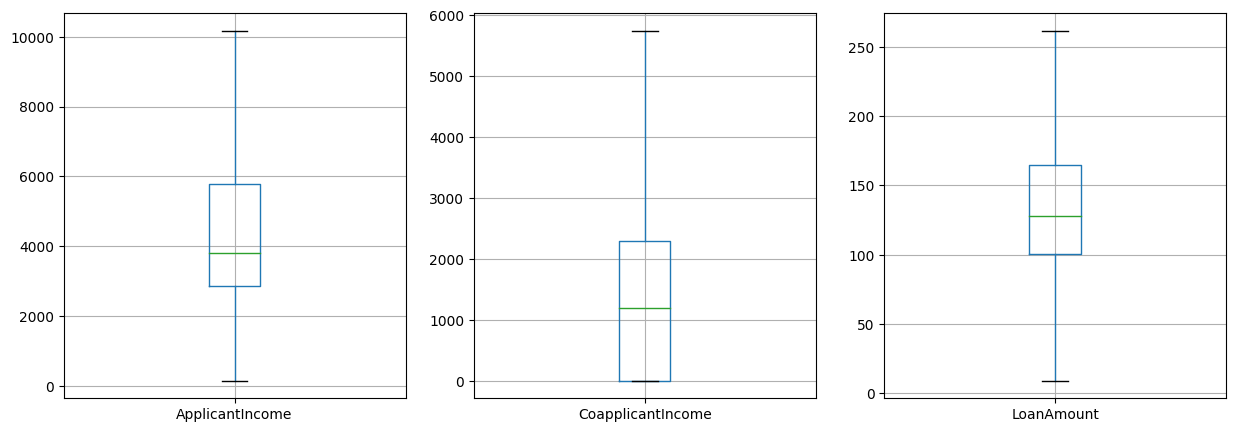

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
 

train_data.boxplot(out_cols[0], ax=ax[0])
train_data.boxplot(out_cols[1], ax=ax[1])
train_data.boxplot(out_cols[2], ax=ax[2])

 
plt.subplots_adjust(wspace=0.2) 

 
plt.show()

#### Dropping Loan_ID column

In [32]:
train_data['Loan_ID'].value_counts()

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [33]:
train_data['Loan_ID'].nunique()

614

In [34]:
train_data.drop(columns='Loan_ID', axis =1 , inplace=True)

In [35]:
train_data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


### Making Loan Status column values (Y/N) to Binary values

In [36]:
map_loan_status  = {'Y': 1, 'N' : 0}
train_data['Loan_Status'] = train_data['Loan_Status'].map(map_loan_status).astype(int)

In [37]:
train_data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1


### Seperating Target Feature and Independent Features

In [38]:
y_train_data = train_data['Loan_Status']

In [39]:
x_train_data = train_data.drop(columns='Loan_Status', axis = 1)

In [40]:
x_train_data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban


### Encoding Categorical Features

In [41]:
col_cat = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area']

In [42]:
x_train_data = pd.get_dummies(x_train_data, columns=col_cat, dtype = int)

In [43]:
x_train_data.head(4)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1


### Scaling Numerical Features

In [44]:
num_col_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
from sklearn.preprocessing import StandardScaler
Std = StandardScaler()
x_train_data[num_col_scale] = Std.fit_transform(x_train_data[num_col_scale])

In [45]:
x_train_data.head(4)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.497164,-0.874587,-0.168041,0.273231,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.013767,0.054395,-0.168041,0.273231,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.652632,-0.874587,-1.280462,0.273231,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.820924,0.578025,-0.311579,0.273231,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1


## [B] Test Data

In [46]:
test_data = pd.read_csv("test_loan.csv")
test_data.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban


In [47]:
test_data.shape

(367, 12)

In [48]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

#### Fixing Missing Values

In [49]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
test_data['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [51]:
test_data['Dependents'].value_counts()

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

In [52]:
test_data['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [53]:
test_data['Credit_History'].value_counts()

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64

In [54]:
test_data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64

In [55]:
for i in ['Gender', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    test_data[i].fillna(test_data[i].mode()[0], inplace =True)

<Axes: >

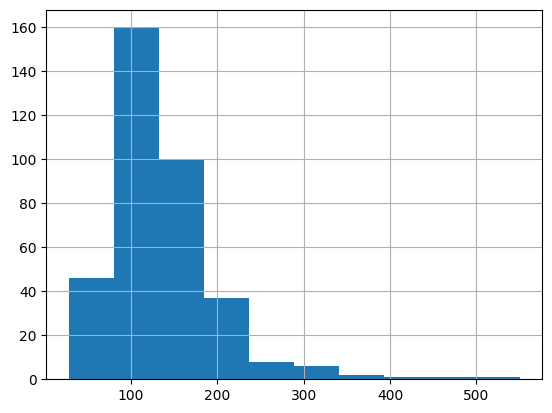

In [56]:
test_data['LoanAmount'].hist()

In [57]:
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)

In [58]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Fixing Outliers

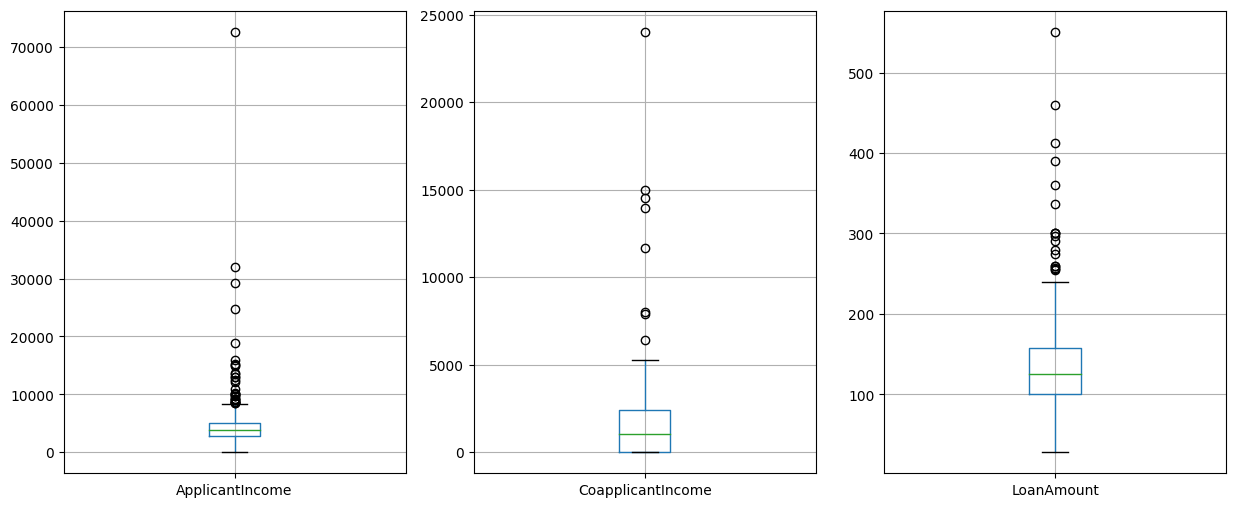

In [59]:
out_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
 

test_data.boxplot(out_cols[0], ax=ax[0])
test_data.boxplot(out_cols[1], ax=ax[1])
test_data.boxplot(out_cols[2], ax=ax[2])

 
plt.subplots_adjust(wspace=0.2) 

 
plt.show()


In [60]:
q1 = test_data['ApplicantIncome'].quantile(0.25)
q3 = test_data['ApplicantIncome'].quantile(0.75)
print('Q1 and Q3 for Applicant Income: ', q1, q3)
iqr = q3-q1
print('IQR : ', iqr)
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print("Upper Limit and Lower Limit: ", upper_limit, lower_limit)

test_data['ApplicantIncome'] = test_data['ApplicantIncome'].apply(cap_floor)

Q1 and Q3 for Applicant Income:  2864.0 5060.0
IQR :  2196.0
Upper Limit and Lower Limit:  8354.0 -430.0


In [61]:
q1 = test_data['CoapplicantIncome'].quantile(0.25)
q3 = test_data['CoapplicantIncome'].quantile(0.75)
print('Q1 and Q3 for Coapplicant Income: ', q1, q3)
iqr = q3-q1
print('IQR : ', iqr)
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print("Upper Limit and Lower Limit: ", upper_limit, lower_limit)

test_data['CoapplicantIncome'] = test_data['CoapplicantIncome'].apply(cap_floor)

Q1 and Q3 for Coapplicant Income:  0.0 2430.5
IQR :  2430.5
Upper Limit and Lower Limit:  6076.25 -3645.75


In [62]:
q1 = test_data['LoanAmount'].quantile(0.25)
q3 = test_data['LoanAmount'].quantile(0.75)
print('Q1 and Q3 for LoanAmount: ', q1, q3)
iqr = q3-q1
print('IQR : ', iqr)
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print("Upper Limit and Lower Limit: ", upper_limit, lower_limit)

test_data['LoanAmount'] = test_data['LoanAmount'].apply(cap_floor)

Q1 and Q3 for LoanAmount:  101.0 157.5
IQR :  56.5
Upper Limit and Lower Limit:  242.25 16.25


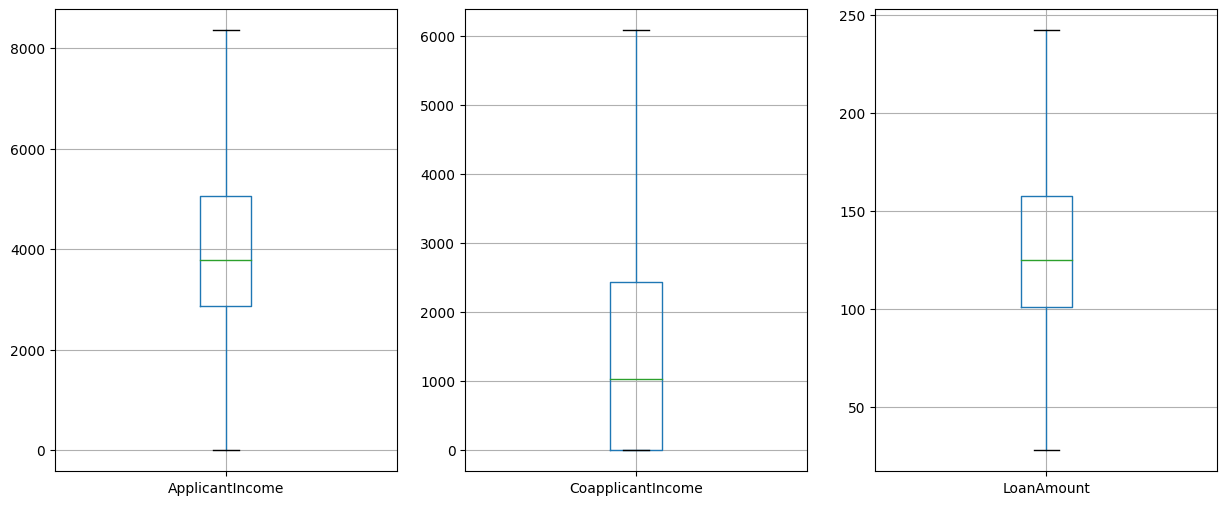

In [63]:
out_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
 

test_data.boxplot(out_cols[0], ax=ax[0])
test_data.boxplot(out_cols[1], ax=ax[1])
test_data.boxplot(out_cols[2], ax=ax[2])

 
plt.subplots_adjust(wspace=0.2) 

 
plt.show()

##### Dropping Load_ID column

In [64]:
test_data['Loan_ID'].nunique()

367

In [65]:
test_data.drop(columns='Loan_ID', axis =1 , inplace = True)

### Encoding Categorical features

In [66]:
col_cat = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area']
x_test_data = test_data.copy()
x_test_data = pd.get_dummies(x_test_data,columns=col_cat, dtype=int)
x_test_data.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720.0,0.0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076.0,1500.0,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000.0,1800.0,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


### Scaling

In [67]:
num_col_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
from sklearn.preprocessing import StandardScaler
Std = StandardScaler()
x_test_data[num_col_scale] = Std.fit_transform(x_test_data[num_col_scale])

In [68]:
x_test_data.head(4)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.760162,-0.892107,-0.468560,0.266022,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.596907,0.046623,-0.127134,0.266022,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.390612,0.234369,1.622677,0.266022,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.974669,0.701230,-0.681952,0.266022,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
